# Words Summary of my best friend chat in 2022

In [1]:
import re #Regular Expressions
import pandas as pd 
import seaborn as sns #plotting tool

In [2]:
words = {} #empty dictionary that will take the words.

In [4]:
Chat = open('BestFriendChat.txt','r',encoding="utf8")
with Chat as f_obj:
    for line in f_obj:
        if re.search('/2022',line):
            for word in line.split():
                word = word.strip()
                if word in words:
                    words[word] +=1
                else:
                    words[word] = 1
## Counts the words and saves them into a dictionary

In [5]:
df = pd.DataFrame(words.items(), columns=['Word', 'Frecuency']) #general dataframe, adding columns name.
df_emojis = df #data frame that will be used for emojis table

### Palabras que más usamos

In [10]:
for i in df['Word']: #cleans the word through regular expressions
    if re.search('/2022',i):
        df = df.drop(df[df['Word'] == i].index) 
    elif (re.fullmatch(r'\d{2}:\d{2}',i) 
    or re.fullmatch(r'hacer',i) 
    or re.fullmatch(r'tengo',i)
    or re.fullmatch(r'Josué',i) 
    or re.fullmatch(r'solo',i)
    or re.fullmatch(r'\w{1,3}',i) 
    or re.fullmatch(r'creo',i) 
    or re.fullmatch(r'cómo',i)
    or re.fullmatch(r'Anneti',i)
    or re.fullmatch(r'Medina:',i)
    or re.fullmatch(r'🥑:',i) 
    or re.fullmatch(r'jaja',i)
    or re.fullmatch(r'-',i) 
    or re.fullmatch(r'<Médias',i) 
    or re.fullmatch('omis>',i)
    or re.fullmatch(r'pero',i) 
    or re.fullmatch(r'porque',i) 
    or re.fullmatch(r'para',i) 
    or re.fullmatch(r'como',i)):
        df = df.drop(df[df['Word'] == i].index)

In [11]:
df_top_words= df.nlargest(15,'Frecuency') #Creates a dataframe to plot the 15 largest words by frecuency

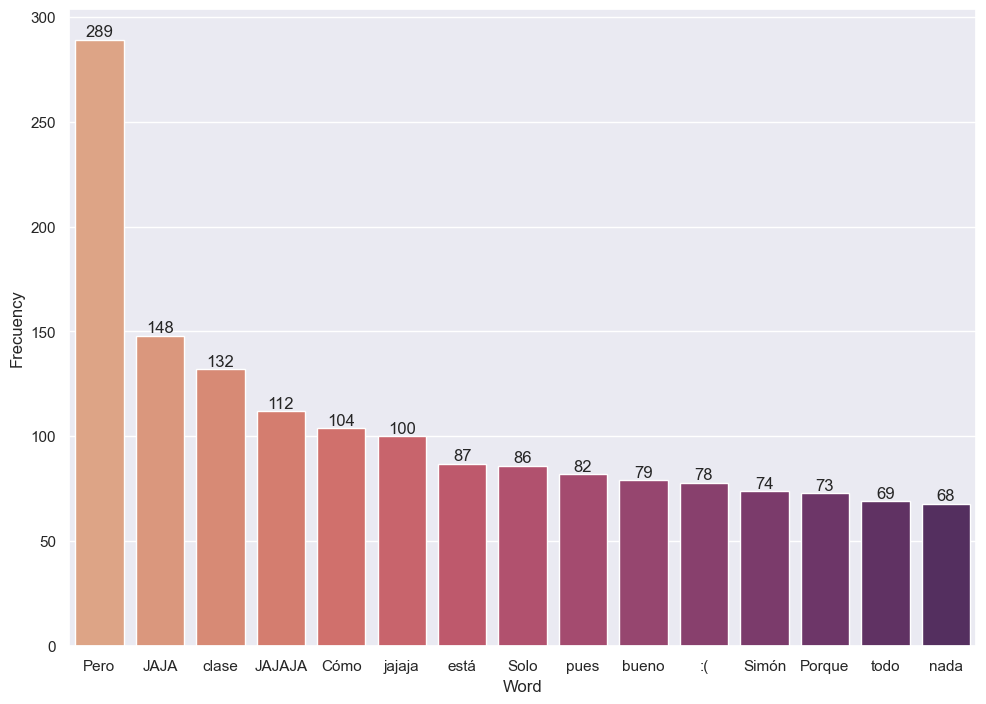

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #sets the size of the figure
barchart = sns.barplot(data=df_top_words,x='Word',y='Frecuency',palette='flare') #creates barplot 
for i in barchart.containers: #adds label to barchart
    barchart.bar_label(i,)

### Emojis que más usamos

In [14]:
for i in df['Word']:
    if len(i)>1:
        df=df.drop(df[df['Word'] == i].index)
## This step drops the words with a lenght of 1 character or more. This allows to take just emojis. 

In [15]:
df_emojis = df.nlargest(10,'Frecuency').reset_index().drop('index',axis=1).rename(columns={'Word':'Emoji'})

In [16]:
df_emojis

cm = sns.light_palette("green", as_cmap=True)

s = df_emojis.style.background_gradient(cmap=cm)
s

,Emoji,Frecuency
0,🧐,63
1,🥴,40
2,👀,30
3,😆,29
4,😅,28
5,🥲,26
6,🤡,26
7,😔,23
8,😎,16
9,🥺,13
